In [ ]:
import numpy as np
import time
import matplotlib.pyplot as plt
!pip install scienceplots
import scienceplots as sp
import sys
plt.style.use(['science','notebook','grid'])



In [ ]:
x_train = np.array([[1,2],[2,1],[3,-0],[2,3],[3,2],[4,1]])
y_train = np.array([0,0,0,1,1,1])

In [ ]:
def compute_cost_vectorized(x,y,w,b):
  z = np.dot(x,w)+b
  g_z = 1/(1+np.exp(-z))
  ep = 1e-8
  loss = -y* np.log(g_z + ep)-(1-y)*np.log(1-g_z+ep)
  total_loss = np.sum(loss)/x.shape[0]
  return total_loss


In [81]:
def gradient_descent(x_train, y_train, initial_w, initial_b, alpha=0.01, tol=1e-8):
    w = np.array(initial_w)
    b = initial_b
    current_cost = compute_cost_vectorized(x_train, y_train, w, b)
    prev_cost = 0

    while abs(current_cost - prev_cost) > tol:
        z = np.dot(x_train, w) + b
        g_z = 1 / (1 + np.exp(-z))

        w = w - alpha * np.dot(x_train.T, g_z - y_train)
        b = b - alpha * np.mean(g_z - y_train)

        prev_cost = current_cost
        current_cost = compute_cost_vectorized(x_train, y_train, w, b)

    return w, b , current_cost


w = [1, 2]
b = 2
alpha = 0.01
trained_w, trained_b,current_cost = gradient_descent(x_train, y_train, w, b, alpha)

In [82]:
print(w)
print(b)
print(current_cost)

[1, 2]
2
0.004050305707584201


In [84]:
w2 = 0
b2 = 2
x_train_2 = np.array([1,2,3,10,11,12])
y_train_2 = np.array([0,0,0,1,1,1])
alpha = 0.01
trained_w_2, trained_b_2,current_cost_2 = gradient_descent(x_train_2, y_train_2, w2, b2, alpha)
print(trained_w_2)
print(trained_b_2)
print(current_cost_2)

1.6164501944502316
-9.856109673286225
0.0017525204786652876


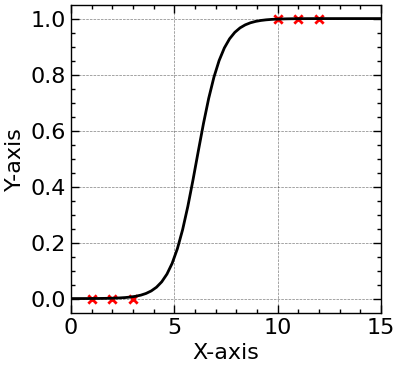

In [95]:

# Given parameters
w = trained_w_2
b = trained_b_2

# Sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-w * x - b))

# Generate x values for the plot
x_values = np.linspace(-10, 15, 100)

# Convert x_values to a NumPy array
x_values = np.array(x_values)

# Compute corresponding y values using the sigmoid function
y_values = sigmoid(x_values)




fig, ax = plt.subplots(figsize=(4,4))

# Plot the sigmoid function
ax.plot(x_values, y_values, label='Sigmoid Function', color='black')
# Plot the scatter plot of the training data
ax.scatter(x_train_2, y_train_2, label='Training Data' ,marker = "x" , color = "red" )



# Set x-axis limits
plt.xlim(0, 15)

# Set labels and legend
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')


# Show the plot
plt.show()
